In [77]:
import pickle
import torch
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import os


ImportError: attempted relative import with no known parent package

In [53]:
with open('../data/tsp/val_cost.pkl', 'rb') as file:
    data = pickle.load(file)
cost = [torch.FloatTensor(x) for x in data]

with open('../data/tsp/val_location.pkl', 'rb') as file:
    data = pickle.load(file)
location = [torch.FloatTensor(x) for x in data]
#location = torch.stack(location)
#(location[:, 1:] - location[:, :-1]).norm(p=2, dim=2).sum(1) + (location[:, 0] - location[:, -1]).norm(p=2, dim=1)

In [62]:
location[1][:10] #.item()

tensor([[52.3238,  4.9279],
        [52.3791,  4.8790],
        [52.3797,  4.8793],
        [52.3798,  4.8794],
        [52.3800,  4.8796],
        [52.3802,  4.8797],
        [52.3803,  4.8797],
        [52.3803,  4.8798],
        [52.3799,  4.8795],
        [52.3802,  4.8797]])

In [60]:
data[1][0][0]

52.32378101

In [23]:
a = torch.Tensor([1,2,3])
a.dtype

torch.float32

In [122]:
seq = []
for i in range(len(cost)):
    pi = np.arange(0, 100)
    rd.shuffle(pi)
    seq.append(pi)

pi_seq = [torch.tensor(i, dtype=torch.int64) for i in seq]
pi_seq = torch.stack(pi_seq, 0)


In [125]:
matrix_by_row = torch.gather(cost, 1, pi_seq.unsqueeze(-1).expand_as(cost))
reorder_cost_data = torch.gather(matrix_by_row, 2, pi_seq.unsqueeze(1).expand_as(cost))



In [126]:
reorder_cost_data[17][5:10][:,5:10]

tensor([[  0.0000,  43.1000,  59.7000,   0.0000,  31.3000],
        [ 81.3000,   0.0000,  16.6000,   0.0000,  69.6000],
        [ 64.7000,  64.8000,   0.0000,   0.0000,  53.0000],
        [674.7000, 693.5000, 695.5000,   0.0000, 681.7000],
        [ 93.1000,  11.8000,  28.4000,   0.0000,   0.0000]])

In [127]:
temp = cost[17]
selected = pi_seq[17][5:10]
temp[selected][:, selected]

tensor([[  0.0000,  43.1000,  59.7000,   0.0000,  31.3000],
        [ 81.3000,   0.0000,  16.6000,   0.0000,  69.6000],
        [ 64.7000,  64.8000,   0.0000,   0.0000,  53.0000],
        [674.7000, 693.5000, 695.5000,   0.0000, 681.7000],
        [ 93.1000,  11.8000,  28.4000,   0.0000,   0.0000]])

In [64]:
a = torch.tensor([])
b = torch.cat((a, torch.LongTensor([1,2,3,4])), dim=0)
torch.cat((b, torch.tensor([1,2,3,4,5,6])), dim=0)
b

tensor([1., 2., 3., 4.])

In [50]:
a = torch.tensor([])
b=torch.cat((a, torch.LongTensor([[1,2,3,4], [4,5,6,7]])), dim=0)#[1:]
b
torch.cat((b, torch.LongTensor([[1,2,3,4], [9,8,7,9]])), dim=0)

tensor([[1., 2., 3., 4.],
        [4., 5., 6., 7.],
        [1., 2., 3., 4.],
        [9., 8., 7., 9.]])

In [34]:
# Original 2D tensor
tensor_2d = torch.tensor([
    [1, 4, 6, 5, 0, 9, 7, 8],
    [3, 0, 2, 6, 1, 7, 5, 4],
    [8, 5, 0, 3, 2, 1, 4, 7]
])

# Function to shift each row from the value 0 onwards
def shift_row(row):
    zero_index = (row == 0).nonzero(as_tuple=True)[0].item()
    part1 = row[zero_index:]  # From value 0 to the end
    part2 = row[:zero_index]  # From the beginning to value 0
    return torch.cat((part1, part2))

# Apply the function to each row and stack the results
new_tensor_2d = torch.stack([shift_row(row) for row in tensor_2d])

print(new_tensor_2d)

tensor([[0, 9, 7, 8, 1, 4, 6, 5],
        [0, 2, 6, 1, 7, 5, 4, 3],
        [0, 3, 2, 1, 4, 7, 8, 5]])


In [ ]:
# function used for shifting the tour so that 0 is the starting point (depot)
def shift_row(row, by='min'):
    if by == 'min':
        zero_index = (row.min()).nonzero(as_tuple=True)[0].item()
    elif by == 'max':
        
        zero_index = (row.max()).nonzero(as_tuple=True)[0].item()
    else:
        zero_index = (row == 0).nonzero(as_tuple=True)[0].item()
    part1 = row[zero_index:]  # From value 0 to the end
    part2 = row[:zero_index]  # From the beginning to value 0
    return torch.cat((part1, part2))
        
# if self.problem == 'tsp':
#     ret_sequences = torch.stack([shift_row(row, by='min') for row in ret_sequences])
#     ret_outpus    = torch.stack([shift_row(row, by='max') for row in ret_outpus])

In [70]:
import random
a = [[1,2,3], [4,5,6], [7,8,9]]
b = [4,7,8]
temp = list(zip(location[:2], cost[:2]))
random.shuffle(temp)
res1, res2 = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
a, b = list(res1), list(res2)


In [3]:
with open('../outputs/tsp_100/tsp100_rollout_20240525_nocost/val_pi.pkl', 'rb') as f:
    data = pickle.load(f)

data

tensor([[ 0., 26., 83.,  ..., 33., 30., 31.],
        [ 0., 91., 98.,  ..., 15., 17., 16.],
        [ 0., 14., 13.,  ...,  2.,  3.,  4.],
        ...,
        [ 0., 51., 56.,  ..., 47., 48.,  4.],
        [ 0., 61., 60.,  ...,  9., 64., 63.],
        [ 0., 49., 47.,  ..., 48., 51.,  4.]])

In [15]:
a = torch.tensor([[1,1,2,3], [4,5,6,7],[8,9,8,10]], dtype=torch.float64)
b = torch.tensor([])
b = torch.cat((b, a[0]), 0)
b = torch.cat((b, a[1]), 0)
b

tensor([1., 1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64)

In [10]:
import pickle
with open('../results/tsp/eval_location/eval_location-tsp_100_tsp100_rollout_20240524T022531-greedy-t1-0-5000.pkl', 'rb') as f:
    data = pickle.load(f)

data


([(1923.6998,
   [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    84,
    85,
    86,
    87,
    88,
    89,
    90,
    91,
    92,
    93,
    94,
    95,
    96,
    97,
    98,
    99],
   8.648553848266602),
  (2328.2998,
   [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,


In [65]:
def sequence_deviation(output_sequences):
    """
    output_sequences should be a list of lists (2D list)
    return: standard deviation of each sequence
    """
    length = output_sequences.size(1)
    SD = 2*torch.sum(torch.abs(output_sequences[:,1:] - output_sequences[:,:-1]) - 1, 1)/(length * (length-1))
    return SD

#sequences = torch.Tensor([[0,1,2,3,4], [4,3,2,1,0], [0,1,3,4,2], [4,2,1,3,0], [1,2,3,4,0]])
with open('../outputs/tsp_100/tsp100_rollout_20240525_cost_100epochs/val_pi.pkl', 'rb') as f:
    data = pickle.load(f)
    data = torch.tensor(data, dtype=torch.int64)
SD = sequence_deviation(data)
torch.max(SD), torch.min(SD), torch.mean(SD), torch.std(SD)

C:\Users\tratru\AppData\Local\Temp\ipykernel_46708\1155337324.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data, dtype=torch.int64)


(tensor(0.7780), tensor(0.), tensor(0.3716), tensor(0.1330))

True

In [11]:
with open('../outputs/tsp_100/tsp100_rollout_20240604T204603_0.001_0.97/val_pi_epoch9.pkl', 'rb') as f:
    data = pickle.load(f)
    data = torch.tensor(data, dtype=torch.int64)
SD = sequence_deviation(data)
torch.max(SD), torch.min(SD), torch.mean(SD), torch.std(SD)

C:\Users\tratru\AppData\Local\Temp\ipykernel_100448\2823480633.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data, dtype=torch.int64)


(tensor(0.6695), tensor(0.), tensor(0.1487), tensor(0.1756))

In [24]:
data

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
         72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
         90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
        [ 0, 91,  7,  6,  9, 49, 18,  8,  3,  2, 19, 43, 61, 69, 44, 59, 98, 41,
         42, 40, 37, 54, 80, 62, 71, 57, 53, 58, 63, 60, 50, 38, 64, 68, 67, 51,
         65, 66, 52, 99, 70, 55, 45, 95, 96, 94, 48, 34, 47, 46, 35, 74, 72, 36,
         33, 93, 73, 82, 32, 56, 81, 83, 84, 90, 31, 24, 30, 28, 26, 29, 27, 92,
         85, 25, 23, 22, 97, 75, 79, 78, 76, 87, 86, 89, 88, 17, 21, 16, 20, 39,
         15, 14, 13, 12, 11, 10,  5,  1, 77,  4],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         

In [25]:
torch.unique(SD, return_counts=True)

(tensor([0.0000e+00, 4.0404e-04, 8.0808e-04, 1.2121e-03, 1.6162e-03, 2.0202e-03,
         2.4242e-03, 2.8283e-03, 3.6364e-03, 4.0404e-03, 4.2424e-03, 4.6465e-03,
         4.8485e-03, 5.6566e-03, 5.8586e-03, 6.2626e-03, 6.4646e-03, 6.6667e-03,
         6.8687e-03, 7.0707e-03, 7.2727e-03, 7.6768e-03, 8.0808e-03, 8.4848e-03,
         8.6869e-03, 9.2929e-03, 9.4949e-03, 9.6970e-03, 9.8990e-03, 1.0303e-02,
         1.0505e-02, 1.0909e-02, 1.1515e-02, 1.2121e-02, 1.2525e-02, 1.2929e-02,
         1.3131e-02, 1.3333e-02, 1.3737e-02, 1.3939e-02, 1.4141e-02, 1.4747e-02,
         1.4949e-02, 1.5354e-02, 1.5556e-02, 1.5758e-02, 1.5960e-02, 1.6162e-02,
         1.6566e-02, 1.6768e-02, 1.6970e-02, 1.7374e-02, 1.7576e-02, 1.7778e-02,
         1.7980e-02, 1.8182e-02, 1.8384e-02, 1.8990e-02, 1.9394e-02, 1.9596e-02,
         1.9798e-02, 2.0000e-02, 2.0404e-02, 2.0606e-02, 2.0808e-02, 2.1010e-02,
         2.1212e-02, 2.1414e-02, 2.1818e-02, 2.2020e-02, 2.2424e-02, 2.2828e-02,
         2.3030e-02, 2.3232e

: 

In [58]:
seq = torch.tensor([0,5,8,2,1,3,5,8])
diffs = torch.abs(seq[1:] - seq[:-1]) - 1
deviation = 2 * torch.sum(diffs) / (len(seq) * (len(seq) - 1))
deviation

tensor(0.2679)

(array([  7.,   9.,  19.,  15.,  12.,  13.,  13.,  16.,  25.,  63.,  77.,
        121., 131., 148., 179., 201., 177., 174., 180., 172., 197., 193.,
        186., 210., 177., 201., 204., 173., 164., 200., 185., 155., 162.,
        145., 156., 139., 107.,  87.,  77.,  56.,  20.,  18.,  13.,  11.,
          5.,   2.,   2.,   2.,   0.,   1.]),
 array([0.        , 0.0155596 , 0.03111919, 0.04667879, 0.06223838,
        0.07779798, 0.09335758, 0.10891717, 0.12447677, 0.14003636,
        0.15559596, 0.17115556, 0.18671515, 0.20227475, 0.21783434,
        0.23339394, 0.24895354, 0.26451313, 0.28007273, 0.29563232,
        0.31119192, 0.32675152, 0.34231111, 0.35787071, 0.3734303 ,
        0.3889899 , 0.40454949, 0.42010909, 0.43566869, 0.45122828,
        0.46678788, 0.48234747, 0.49790707, 0.51346667, 0.52902626,
        0.54458586, 0.56014545, 0.57570505, 0.59126465, 0.60682424,
        0.62238384, 0.63794343, 0.65350303, 0.66906263, 0.68462222,
        0.70018182, 0.71574141, 0.73130101, 0.

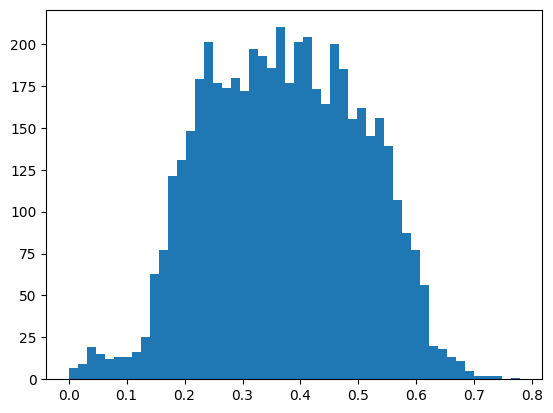

In [14]:
plt.hist(SD, bins=50)

In [70]:
SD

tensor([0.5545, 0.4568, 0.2273,  ..., 0.4234, 0.4014, 0.2857])

In [74]:
2*torch.sum(torch.abs(data[:,1:] - data[:,:-1]) - 1, 1)/()

tensor([5.4900e+03, 2.2610e+03, 7.5000e+02,  ..., 8.3874e-01, 7.9496e-01,
        5.6560e-01])

In [79]:
data.size(2)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [6]:
a = torch.tensor([], dtype=torch.int64)
b = torch.cat((a, torch.tensor([1,2,3])), 0)
b

tensor([1, 2, 3])

In [65]:
p = np.arange(1, 100)
rd.shuffle(p)
a = np.append(0, p)
a

array([ 0,  7, 80, 59, 51, 39, 85, 25, 55, 68, 48, 30,  1, 69, 98, 64, 58,
       18, 63, 47, 19, 76, 37, 90, 89, 22, 42, 61, 96, 49, 62, 14, 32, 60,
       74, 75, 84, 67, 34, 77, 50, 38, 70, 15, 88, 28, 94, 86, 71, 65, 52,
       23, 87, 46, 79, 40, 72,  5, 95,  4, 45,  2, 21, 91, 35, 81, 53, 93,
       41, 56,  9, 36, 44, 97, 26, 16, 24, 82, 12, 11, 27, 20, 33, 43, 17,
        8, 31, 54, 57, 78, 83, 73,  3, 99,  6, 29, 10, 13, 66, 92])

In [105]:
arr = []
for i in range(5):
    p = np.arange(1, 100)
    rd.shuffle(p)
    k = np.append(0, p)
    arr.append(k)
arr

[array([ 0, 85,  2, 51, 41, 64, 84, 19, 16, 48, 74, 88, 27, 55, 86, 49, 18,
        77, 98, 38, 57, 68,  3,  7, 82,  6, 80, 69, 53, 66, 79, 23, 90, 97,
        71, 89, 36,  4, 95, 70, 62, 24, 44, 46, 34,  8, 45, 91, 54, 78, 99,
        13, 22,  5, 92, 39, 31, 52, 83, 42, 25, 65, 32, 81, 28, 76, 21, 72,
        63, 33, 50, 43, 93, 67, 20, 56, 47, 15, 96, 58, 17, 35,  1, 87, 14,
        73, 61, 12, 75, 30, 60,  9, 59, 37, 26, 29, 94, 10, 40, 11]),
 array([ 0, 15, 27, 80,  5, 94, 62, 40, 31, 90, 42, 59, 82, 10, 43, 79, 54,
        35,  4, 28,  7, 56, 63, 23, 61, 51, 75, 95, 46, 77, 25, 67, 53, 33,
        13, 93, 49, 99, 47, 71, 21, 38, 76, 98,  8, 60, 52, 39, 78, 84, 83,
        74,  2, 41, 64, 36, 72, 29,  6, 97,  9, 96, 66, 89, 58, 55, 32, 30,
        17, 19, 57, 11, 45, 91, 87, 14, 12,  1,  3, 70, 16, 88, 50, 20, 73,
        44, 48, 68, 22, 18, 24, 69, 92, 65, 86, 81, 34, 85, 37, 26]),
 array([ 0, 11, 36, 68, 78,  2, 12, 49, 77, 65, 15, 45,  4,  9, 83, 28, 47,
        92, 23, 24, 75, 

In [21]:
origin = np.array([0,1,2,3,4,5,6,7,8,9])
sort1 =  np.array([1,4,6,7,9,0,3,2,8,5])
origin1 = origin[sort1]

sort2 = np.array([0,2,4,7,8,3,5,9,1,6])
origin2 = origin1[sort2]

origin1, origin2

(array([1, 4, 6, 7, 9, 0, 3, 2, 8, 5]), array([1, 6, 9, 2, 8, 7, 0, 5, 4, 3]))

In [27]:
driver = np.array([0,1,2,3,4,5])
sort1 = np.array([0,1,4,5,3,2])

input = driver[sort1]
pi = np.array([0,4,2,5,3,1])
sequence_deviation([input[pi]]) # seq compare to driver tour

[0.5333333333333333]

In [71]:
random = [[0,1,4,5,3,2],[0,1,2,3,4,5],[0,2,4,5,3,1]]
pi = [[0,4,2,5,3,1],[0,5,1,3,2,4],[0,4,1,5,3,2]]

def shift_row(row):
    zero_index = (row == 0).nonzero(as_tuple=True)[0].item()
    part1 = row[zero_index:]  # From value 0 to the end
    part2 = row[:zero_index]  # From the beginning to value 0
    return torch.cat((part1, part2))

def sequence_deviation(output_sequences):
    """
    output_sequences should be a list of lists (2D list)
    return: standard deviation of each sequence
    """
    if not isinstance(output_sequences, torch.Tensor):
        output_sequences = [torch.tensor(i, dtype=torch.int64) for i in output_sequences]
        output_sequences = torch.stack(output_sequences)
    length = output_sequences.size(1)
    SD = 2*torch.sum(torch.abs(output_sequences[:,1:] - output_sequences[:,:-1]) - 1, 1)/(length * (length-1))
    return SD

[shift_row(torch.tensor(i)) for i in random]

[tensor([0, 1, 4, 5, 3, 2]),
 tensor([0, 1, 2, 3, 4, 5]),
 tensor([0, 2, 4, 5, 3, 1])]

In [64]:
random[:,1:] - random[:,:-1]

TypeError: list indices must be integers or slices, not tuple

In [75]:
from utils.plot import plot_training_result
save_dir = 'outputs/tsp_100/tsp100_rollout_20240610T160931_0.001_0.96_100epochs'
with open(os.path.join(save_dir, 'training_bl_cost.pkl'), 'rb') as f:
    training_bl_cost = pickle.load(f)
    
with open(os.path.join(save_dir, 'baseline_cost.pkl'), 'rb') as f:
    baseline_cost = pickle.load(f)
with open(os.path.join(save_dir, 'freeze_baseline_cost.pkl'), 'rb') as f:
    freeze_baseline_cost = pickle.load(f)
with open(os.path.join(save_dir, 'validation_cost.pkl'), 'rb') as f:
    validation_cost = pickle.load(f)
plot_item = [training_bl_cost[1:], baseline_cost[1:], freeze_baseline_cost[1:], validation_cost[1:]]
legends   = ['training_cost_Greedy', 'eval_cost_Greedy', 'eval_cost_Greedy_Freezed', 'validation_cost']
plot_training_result(cost   = plot_item,
                     legend = legends, 
                     title  = 'training-eval-val cost over epochs',
                     save_path=os.path.join(save_dir, 'result.png'),
                     plus     =True)

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]